# **Predicting Health Insurance**

**Introduction to Data Science 2024/2025 | Group Q**

| Name          | Number      |
| ------------- | ----------- |
| Athos Freitas | up202108792 |
| José Santos   | up202108729 |
| Luís Du       | up202105385 |

## **Table of Contents**

- [1. Business Understanding](#1-business-understanding)
- [2. Data Understanding](#2-data-understanding)
  - [2.1. Initial Data Collection](#21-initial-data-collection)
  - [2.2. Data Description](#22-data-description)
  - [2.3. Data Exploration](#23-data-exploration)
    - [2.3.1. Health Insurance](#231-health-insurance)
    - [2.3.2. Genre](#232-genre)
    - [2.3.3. Age](#233-age)
    - [2.3.4. Income](#234-income)
    - [2.3.5. State of Residence](#235-state-of-residence)
    - [2.3.6. Income by Age Group](#236-income-by-age-group)
    - [2.3.7. Probability of Health Insurance by Age](#237-probability-of-health-insurance-by-age)
    - [2.3.8. Marital Status by Housing Type](#238-marital-status-by-housing-type)
    - [2.3.9. Health Insurance by Marital Status](#239-health-insurance-by-marital-status)
    - [2.3.10. Correlation Matrix](#2310-correlation-matrix)
- [3. Data Preparation](#3-data-preparation)
  - [3.1. Handling Missing Values](#31-handling-missing-values)
  - [3.2. Outlier Detection and Removal](#32-outlier-detection-and-removal)
  - [3.3. Feature Engineering](#33-feature-engineering)
  - [3.4. Data Encoding and Scaling](#34-data-encoding-and-scaling)
- [4. Modelling](#4-modelling)
  - [4.1. K-Nearest Neighbour](#41-k-nearest-neighbour)
  - [4.2. Gaussian Naive Bayes](#42-gaussian-naive-bayes)
  - [4.3. Decision Tree](#43-decision-tree)
  - [4.4. Random Forest](#44-random-forest)
  - [4.5. Support Vector Machine (SVM)](#45-svm)
  - [4.6. Neural Network](#46-neural-network)
  - [4.7. XGBoost](#47-xgboost)
  - [4.8. Logistic Regression](#48-logistic-regression)
- [5. Evaluation and Main Conclusions](#5-evaluation-and-main-conclusions)
  - [5.1. Gains from Our Effort](#51-gains-from-our-effort)
  - [5.2. Lessons Learned](#52-lessons-learned)
  - [5.3. Summary of Achieved Results](#53-summary-of-achieved-results)
- [6. Submission](#6-submission)
  - [6.1. Preprocessing](#61-preprocessing)
  - [6.2. XGBoost](#62-xgboost)
  - [6.3. Random Forest](#63-random-forest)
  - [6.4. Decision Tree](#64-decision-tree)
  - [6.5. SVM](#65-svm)


## **Introduction**

This project aims to explore the application of machine learning techniques to predict whether a customer has health insurance. The primary focus is on investigating different models, fine-tuning their parameters, and evaluating their performance using various metrics to identify the most effective approach for accurate prediction.

## **1. Business Understanding**

| **Category**                          | **Details**                                                                 |
|---------------------------------------|-----------------------------------------------------------------------------|
| Background                            | In the US, health insurance is important for the financial security of the population. Companies aim to improve enrollment rates. Predicting whether a customer is likely to take up insurance can help optimize resource allocation and improve customer engagement strategies. |
| Business Objectives                   | Build a model to predict which of your customers don’t have health insurance. |
| Business Success Criteria             | Successfully predict the customers that don't have health insurance according to the provided data. |
| Inventory of Resources                | **Data**: A dataset with demographic and behavioral attributes such as employment status, income, housing type, marital status, and more. <br> **Tools**: Python Libraries, Jupyter Notebook. |
| Assumptions                           | Data accurately reflects the characteristics of customers.                   |
| Constraints                           | Data imbalance in certain attributes.                                        |
| Risks and Contingencies               | **Risk**: Missing values or noisy data could reduce model accuracy. <br> **Contingency**: Data cleaning and preprocessing steps. |
| Costs and Benefits                    | **Costs**: Initial setup, data preprocessing, and operationalizing the model. <br> **Benefits**: Improved conversion rates and data-driven decision-making. |
| Data Mining Goals                     | Develop a predictive model to classify customers based on their likelihood to purchase health insurance. <br> Identify the most influential factors that drive insurance uptake. |
| Data Mining Success Criteria          | Model accuracy above 80%. <br> Identify the top 5 features that influence insurance uptake. |


## **Setup**

In [54]:
%pip install matplotlib seaborn pandas numpy scikit-learn imbalanced-learn tensorflow xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Markdown
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, backend as K
from xgboost import XGBClassifier
import xgboost as xgb

## **2. Data Understanding**

In this section, we will perform **Exploratory Data Analysis** on the dataset to gain a deeper understanding of its structure, distribution, and relationships between variables.

To streamline the visualization process, we will start by creating a `Utils` class that will contain reusable methods for generating various plots and charts.

In [56]:
class Utils:
    
    def __init__(self, df):
        self.df = df
    
    # Print statistics
    
    def update_df(self, df):
        self.df = df
        
    def print_stats(self, feature):
        table = '| Label | Count | Percentage |\n| --- | --- | --- |\n'
        
        feature_with_na = self.df[feature].fillna('Missing')
        for label in feature_with_na.value_counts().index:
            count = feature_with_na.value_counts()[label]
            percentage = count / len(self.df) * 100
            table += '| {} | {} | {:.2f} % |\n'.format(label, count, percentage)
            
        return Markdown(table)
    
    def print_numeric_stats(self, feature):
        table = '| Statistics | Value |\n'
        table += '| --- | --- |\n'
        table += '| Mean | {:.2f} |\n'.format(self.df[feature].mean())
        table += '| Standard Deviation | {:.2f} |\n'.format(self.df[feature].std())
        table += '| Minimum | {:.2f} |\n'.format(self.df[feature].min())
        table += '| 25th percentile | {:.2f} |\n'.format(self.df[feature].quantile(0.25))
        table += '| Median | {:.2f} |\n'.format(self.df[feature].median())
        table += '| 75th percentile | {:.2f} |\n'.format(self.df[feature].quantile(0.75))
        table += '| Maximum | {:.2f} |'.format(self.df[feature].max())
        table += '| IQR | {:.2f} |'.format(self.df[feature].quantile(0.75) - self.df[feature].quantile(0.25))
        table += '| Skewness | {:.2f} |'.format(self.df[feature].skew())
        table += '| Kurtosis | {:.2f} |'.format(self.df[feature].kurt())
        table += '| NA values | {} |'.format(self.df[feature].isna().sum())
        return Markdown(table)

    # Plot statistics

    def plot_stats(self, feature, with_target_value=False):        
        plt.figure(figsize=(8, 4))
        
        if with_target_value:
            sns.boxplot(x=feature, data=self.df, hue='health_ins')
        else:
            sns.boxplot(x=feature, data=self.df)

        plt.title(f'{feature} boxplot')
        plt.show()
        
    # Plot distribution
        
    def plot_dist(self, feature):
        pd.crosstab(self.df[feature].fillna('Missing'), self.df['health_ins']).plot(kind='bar', stacked=True)
        plt.title(f'{feature} distribution')
        plt.xticks(rotation=45)
        plt.show()
        
    def plot_numeric_dist(self, feature, plot_outliers=True):
        # Calculate outliers using the IQR method
        Q1 = self.df[feature].quantile(0.25)
        Q3 = self.df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Split the data into inliers and outliers
        inliers = self.df[(self.df[feature] >= lower_bound) & (self.df[feature] <= upper_bound)][feature]
        outliers = self.df[(self.df[feature] < lower_bound) | (self.df[feature] > upper_bound)][feature]

        # Plot inliers (blue) and outliers (light red)
        sns.histplot(inliers, kde=True, bins=20, color='blue', label='Inliers') 
        if plot_outliers:
            sns.histplot(outliers, kde=True, bins=20, color='lightcoral', label='Outliers')
            plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
            plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

        plt.legend()
        plt.title(f'{feature} distribution')
        plt.show()

### **2.1. Initial Data Collection**

In [57]:
df = pd.read_csv('customer.csv')
utils = Utils(df)

df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


### **2.2. Data Description**

The dataset has:

- **72458** observations

- **15** variables

- **0** duplicate rows

- **35%** missing values in **is_employed**
  
- **2.33%** missing values in **housing_type**, **num_vehicles**, **gas_usage** and **recent_move_b**

#### ➜ **Missing values**

As observed, the features **housing_type, num_vehicles, gas_usage**, and **recent_move_b** share the same rows with missing values. This indicates that certain records in the dataset have a significant amount of missing data.

![Missing values](images/missing_values.png "Optional Title")

#### ➜ **Variable types**

| Type        | Number | Variables                                                        |
| ----------- | ------ | ---------------------------------------------------------------- |
| Numeric     | 7      | unamed, income, num_vehicles, age, code_column, gas_usage, rooms |
| Text        | 2      | custid, state_of_res                                             |
| Categorical | 3      | sex, marital_status, housing_type                                |
| Boolean     | 3      | is_employed, health_ins, recent_move_b                           |


### **2.3. Data Exploration**

All features were thoroughly plotted and analyzed as part of our exploratory data analysis. However, to streamline the code and focus on key insights, we have included only the **most relevant figures** and tables in this report.

#### **2.3.1. Health insurance**

The target variable is **highly imbalanced**, with only 9.53% of customers not having health insurance.

In [58]:
utils.print_stats(feature='health_ins')

| Label | Count | Percentage |
| --- | --- | --- |
| True | 65553 | 90.47 % |
| False | 6905 | 9.53 % |


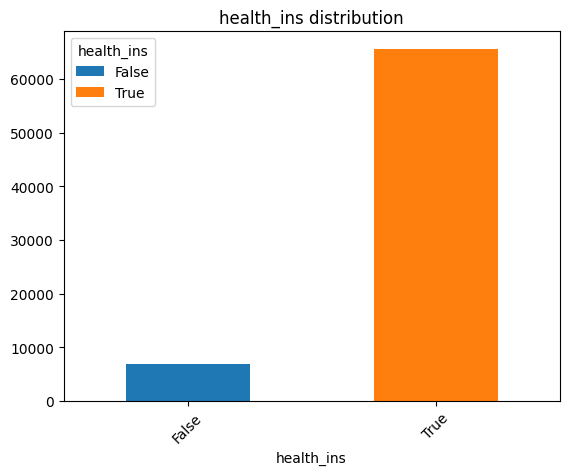

In [59]:
utils.plot_dist(feature='health_ins')

#### **2.3.2. Genre**

In contrast, the gender distribution is relatively uniform, with fewer male customers overall. However, the proportion of male customers without health insurance is higher compared to female customers without health insurance.

In [60]:
utils.print_stats(feature='sex')

| Label | Count | Percentage |
| --- | --- | --- |
| Female | 37461 | 51.70 % |
| Male | 34997 | 48.30 % |


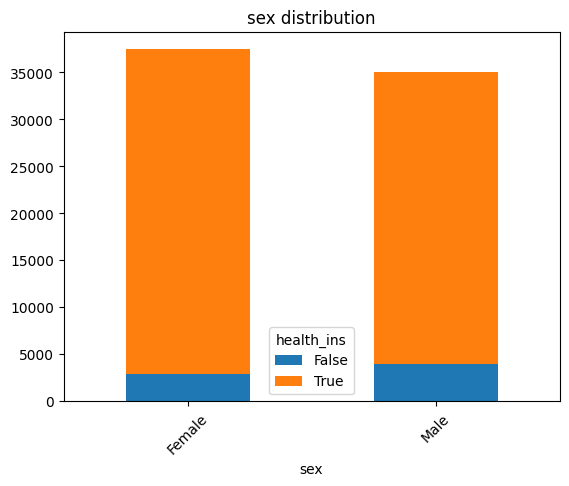

In [61]:
utils.plot_dist(feature='sex')

#### **2.3.3. Age**

For the age feature, we observe that some individuals are listed as 120 years old, which is clearly unrealistic. This suggests the need for preprocessing to handle such anomalies.

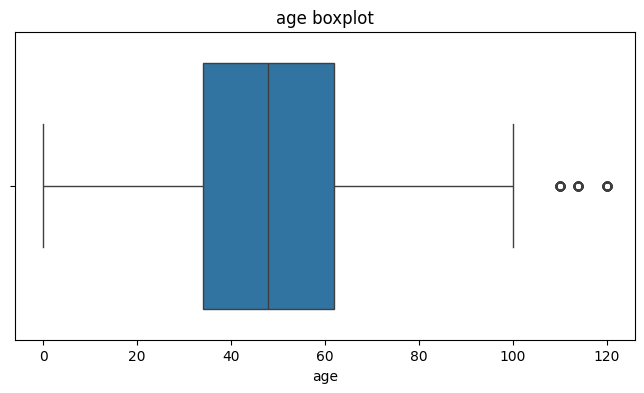

In [62]:
utils.plot_stats('age')

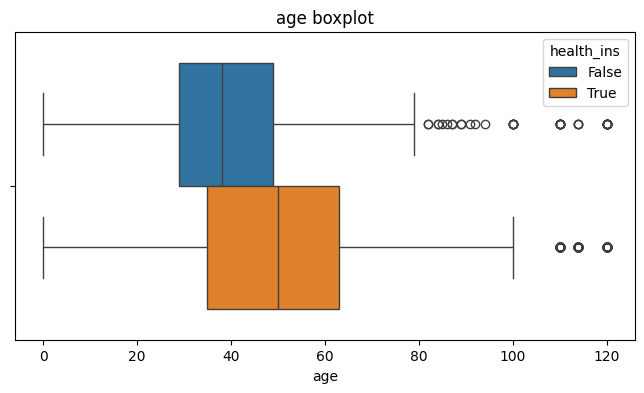

In [63]:
utils.plot_stats('age', with_target_value=True)

Most of the customers are young or early 40s, between 18 and 45 years old.

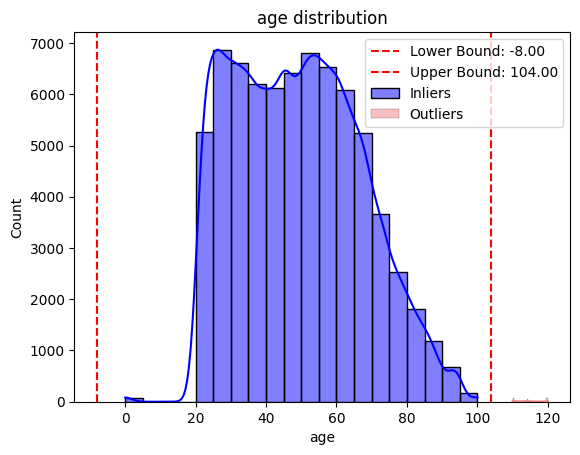

In [64]:
utils.plot_numeric_dist('age')

#### **2.3.4. Income**

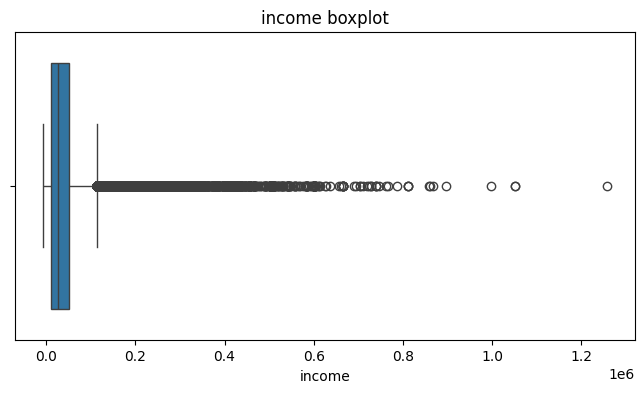

In [65]:
utils.plot_stats('income')

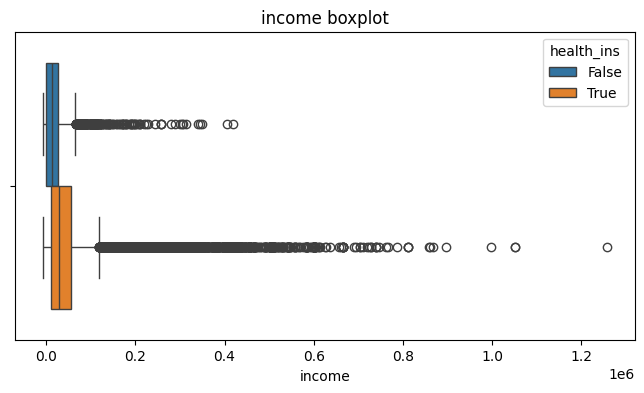

In [66]:
utils.plot_stats('income', with_target_value=True)

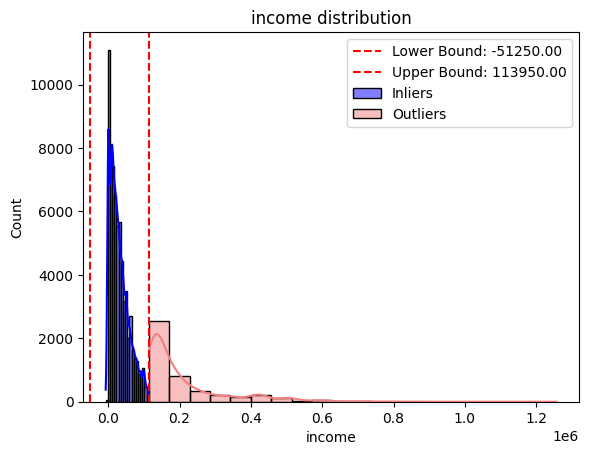

In [67]:
utils.plot_numeric_dist('income')

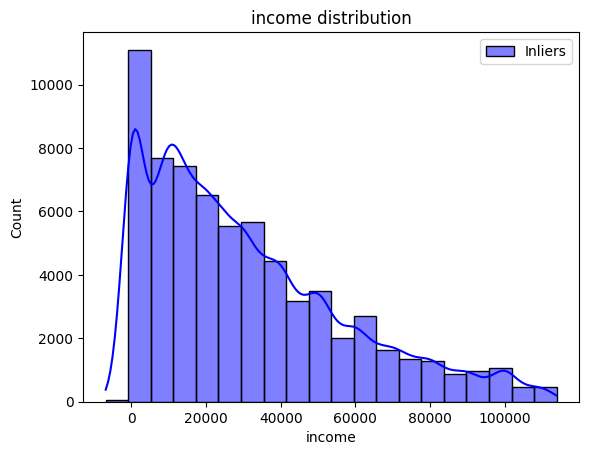

In [68]:
utils.plot_numeric_dist('income', plot_outliers=False)

#### **2.3.5. State of residence**

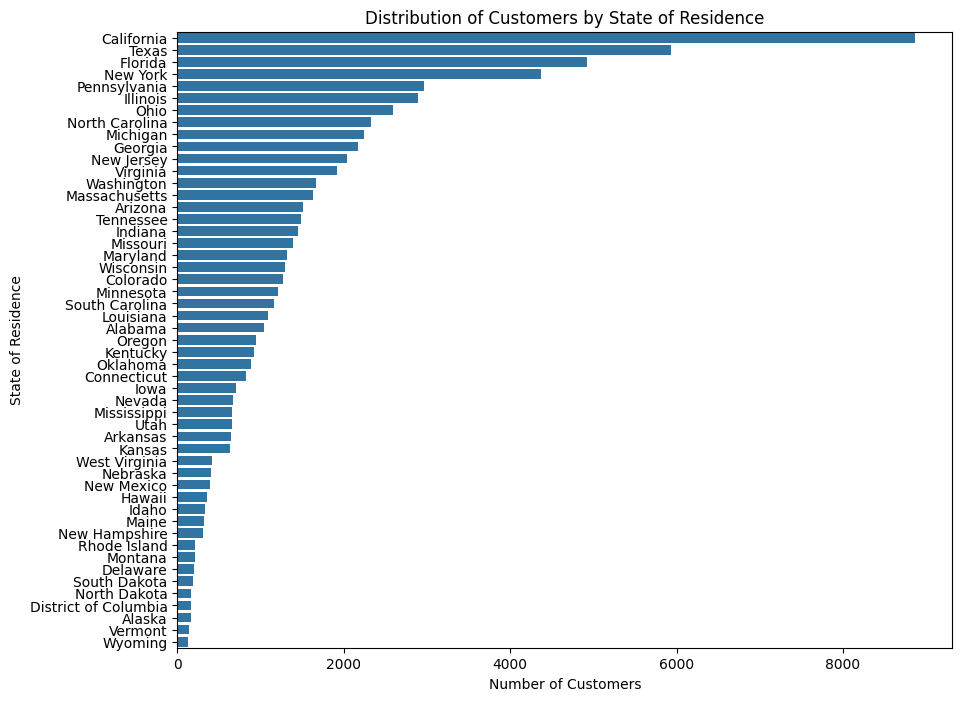

In [69]:
plt.figure(figsize=(10, 8))
sns.countplot(y='state_of_res', data=df, order=df['state_of_res'].value_counts().index)
plt.title('Distribution of Customers by State of Residence')
plt.xlabel('Number of Customers')
plt.ylabel('State of Residence')
plt.show()

The attributes **state_of_res** and **code_column** are directly related, as each state has a unique code. This suggests that one of these features should be dropped to avoid redundancy.

In [70]:
states_with_multiple_codes = df.groupby('state_of_res')['code_column'].nunique()
states_with_multiple_codes = states_with_multiple_codes[states_with_multiple_codes > 1]

print(states_with_multiple_codes)

Series([], Name: code_column, dtype: int64)


#### **2.3.6. Income by age group**

##### **➜ Scatterplot**

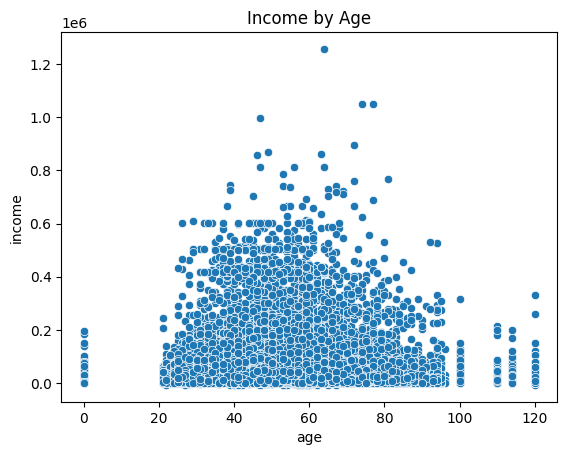

In [71]:
sns.scatterplot(x='age', y='income', data=df)
plt.title('Income by Age')
plt.show()

##### **➜ Boxplot**

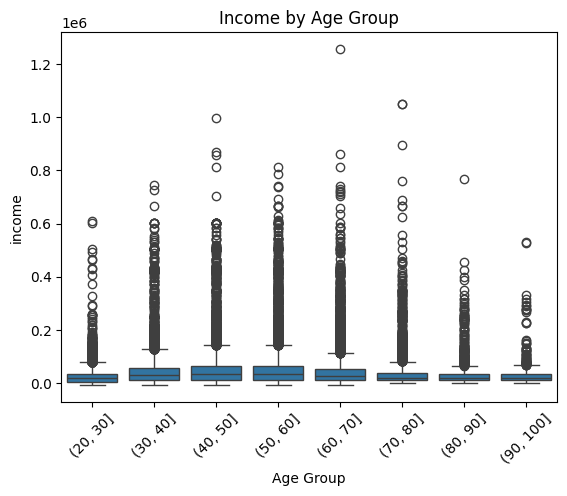

In [72]:
sns.boxplot(x=pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100]), y='income', data=df)
plt.title('Income by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

#### **2.3.7. Probability of health insurance by age**

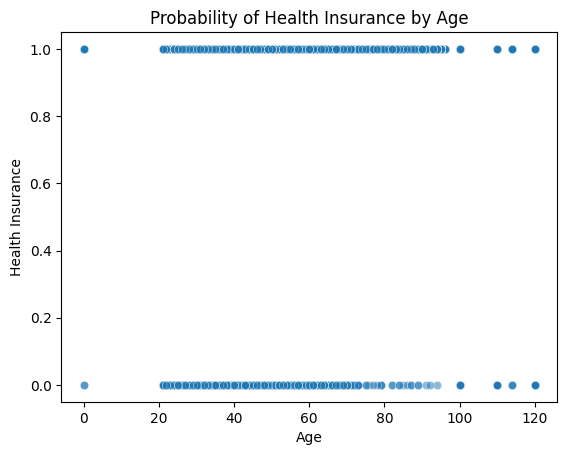

In [73]:
sns.scatterplot(x='age', y='health_ins', data=df, alpha=0.5)
plt.title('Probability of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Health Insurance')
plt.show()

#### **2.3.8. Marital status by housing type**

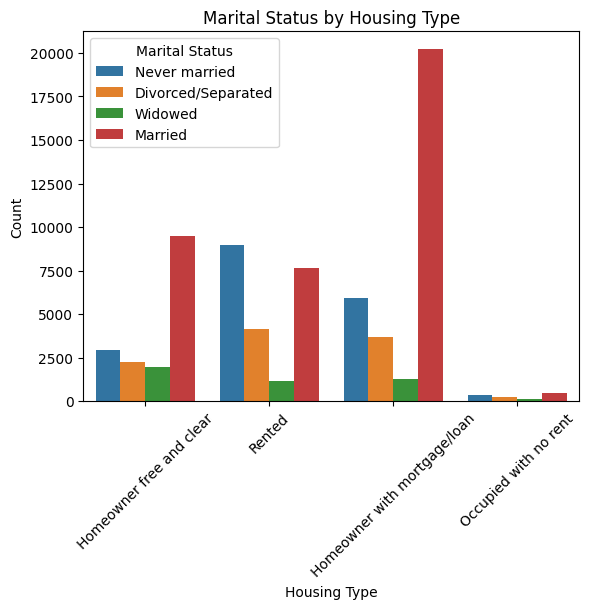

In [74]:
sns.countplot(x='housing_type', hue='marital_status', data=df)
plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

#### **2.3.9. Health insurance by marital status**

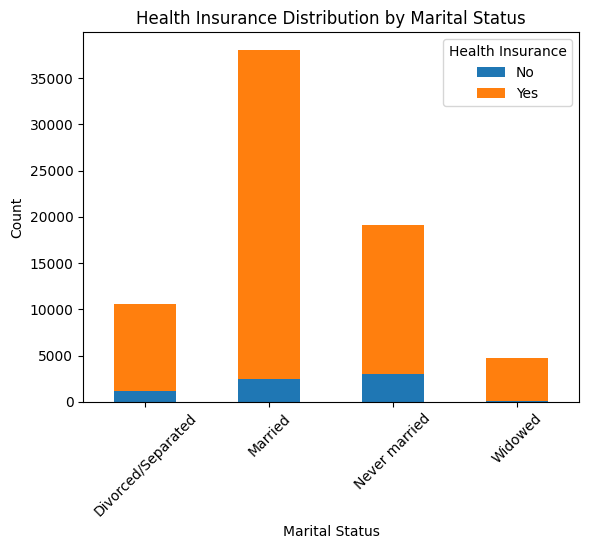

In [75]:
pd.crosstab(df['marital_status'], df['health_ins']).plot(kind='bar', stacked=True)
plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

#### **2.3.10. Correlation Matrix**

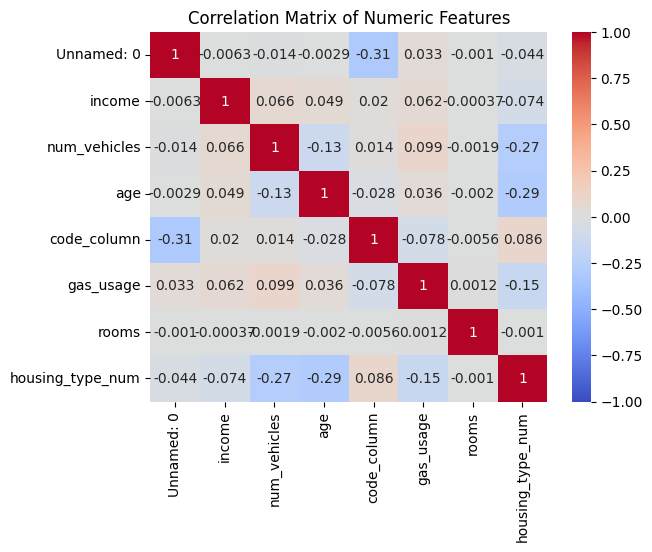

In [76]:
corr_df = df.copy()
corr_df['housing_type_num'] = corr_df['housing_type'].astype('category').cat.codes

correlation_matrix = corr_df.select_dtypes(include=[np.number]).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

---

## **3. Data Preparation**

After thoroughly understanding the dataset, we identified several aspects that need to be addressed in order to ensure the data is clean and suitable for modeling.

### **3.1. Data Selection**

- **Drop unamed column and Customer ID**: neither variable is necessary to train the models so both can be dropped

- **Highly correlated features: State of Residence and Code Column**: since the code column does not add any information to the state of residence, it can be dropped.

In [77]:
df.drop(columns=['Unnamed: 0', 'custid', 'code_column'], inplace=True)

### **3.2. Data Cleaning**

#### **➜ Handling rows with many missing values:** 

Since some models do not support missing values, rows that have more than two missing values will be dropped for model evaluation.

In [78]:
rows_with_missing = df.isnull().sum(axis=1) > 2
df.drop(df[rows_with_missing].index, inplace=True)

#### **➜ Handling null values** 

- **Is employed:**

In [79]:
df['is_employed'] = df['is_employed'].fillna('Not in Workforce')
df['is_employed'] = df['is_employed'].replace({True: 'Employed', False: 'Unemployed'})

- **Number of vehicles:**

In order to handle the missing Number of vehicle values, we decided to use the rounded mean value.

In [80]:
df['num_vehicles'] = df['num_vehicles'].fillna(round(df['num_vehicles'].mean(),0))

- **Recent move**

In this case we used the mode since the attribute is categorical and transformed it into a boolean attribute

In [81]:
df['recent_move_b'] = df['recent_move_b'].fillna(df['recent_move_b'].mode()[0])
df['recent_move_b'] = df['recent_move_b'].replace({'T': True, 'F': False})

C:\Users\User\AppData\Local\Temp\ipykernel_4324\1087636421.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recent_move_b'] = df['recent_move_b'].replace({'T': True, 'F': False})


#### **➜ Handling age outliers**

We decided to handle the outliers in the age feature by replacing them with the median value.

In [82]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
median_age = df['age'].median()
df['age'] = df['age'].apply(lambda x: median_age if x < lower_bound or x > upper_bound else x)

### **3.3. Data Construction**

#### **➜ Gas Usage and categories**

According to the data dictionary provided, the values of the gas usage attribute include some information beyond the actual monthly billing amount.

In [83]:
def handle_gas_feature(df):
    gas_median = df[df['gas_usage'] > 3].gas_usage.median()

    non_bill_cases_values = {
        1: gas_median,
        2: gas_median,
        3: 0
    }
    non_bill_cases = {
        1: 'Included in rent', 
        2: 'Included in electricity', 
        3: 'No charge'
    }

    # New feature for gas usage category
    df['gas_category'] = df['gas_usage'].replace(non_bill_cases).where(
        df['gas_usage'].isin(non_bill_cases.keys()), 'Actual Bill'
    )
    df.loc[pd.isna(df['gas_usage']), 'gas_category'] = 'Unknown'

    # Replace non-bill cases' values or maintain if not included
    df['gas_usage'] = df['gas_usage'].replace(non_bill_cases_values)
    df['gas_usage'] = df['gas_usage'].fillna(gas_median)

    iqr = df['gas_usage'].quantile(0.75) - df['gas_usage'].quantile(0.25)
    lower_bound = df['gas_usage'].quantile(0.25) - 1.5 * iqr
    upper_bound = df['gas_usage'].quantile(0.75) + 1.5 * iqr

    df.loc[df['gas_usage'] < lower_bound, 'gas_usage'] = lower_bound
    df.loc[df['gas_usage'] > upper_bound, 'gas_usage'] = upper_bound

    df['gas_income'] = df['gas_usage'] * df['income']

In [84]:
handle_gas_feature(df)

#### **➜ Age x Income**

The relationship between Age and Income is important to explore, as it can reveal trends or patterns that may influence the prediction of health insurance status.

In [85]:
df['age_income'] = df.age * df.income

### **3.4. Data Formatting**

This task consisted of choosing the most appropriate transformations for each type of  feature to be applied before training the classifier models.

In [86]:
label_features = ['state_of_res']
categorical_features = ['sex', 'marital_status', 'housing_type', 'gas_category', 'recent_move_b', 'is_employed', 'health_ins'] 
numerical_features = ['income','num_vehicles', 'age', 'gas_usage', 'rooms', 'age_income','gas_income']  

features = label_features + categorical_features + numerical_features

preprocessor = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(), label_features),
        ('onehot', OneHotEncoder(drop='first'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)        
    ],
    remainder='passthrough'
)

For our models, we decided to use one hot encoding for the categorical features except state of residency, as that would create 50 additional columns on the dataframe.

#### **3.4.1 Sampling**

We chose to use some sampling techniques to handle the class imbalance issue. By applying these techniques, our models achieve more consistent results and are able to generalize to both classes instead of focusing on the majority class.

##### **➜ Smote**

In [87]:
def smote_data(X, y):
    smote = ADASYN(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

##### **➜ Random Oversampling**

In [88]:
def oversample_data(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    return X_resampled, y_resampled

##### **➜ Undersampling**

In [89]:
def undersample_data(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

### **3.5. Data Description**

#### **➜ Visualization of features after transformation**

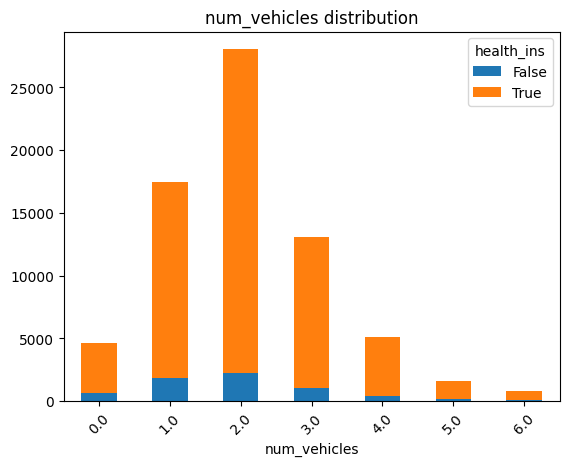

In [90]:
utils.plot_dist('num_vehicles')

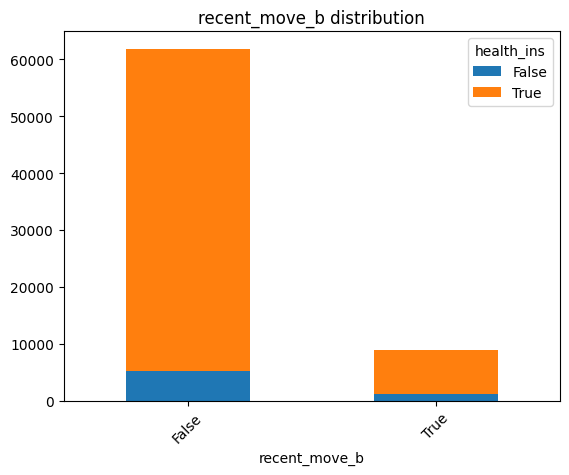

In [91]:
utils.plot_dist('recent_move_b')

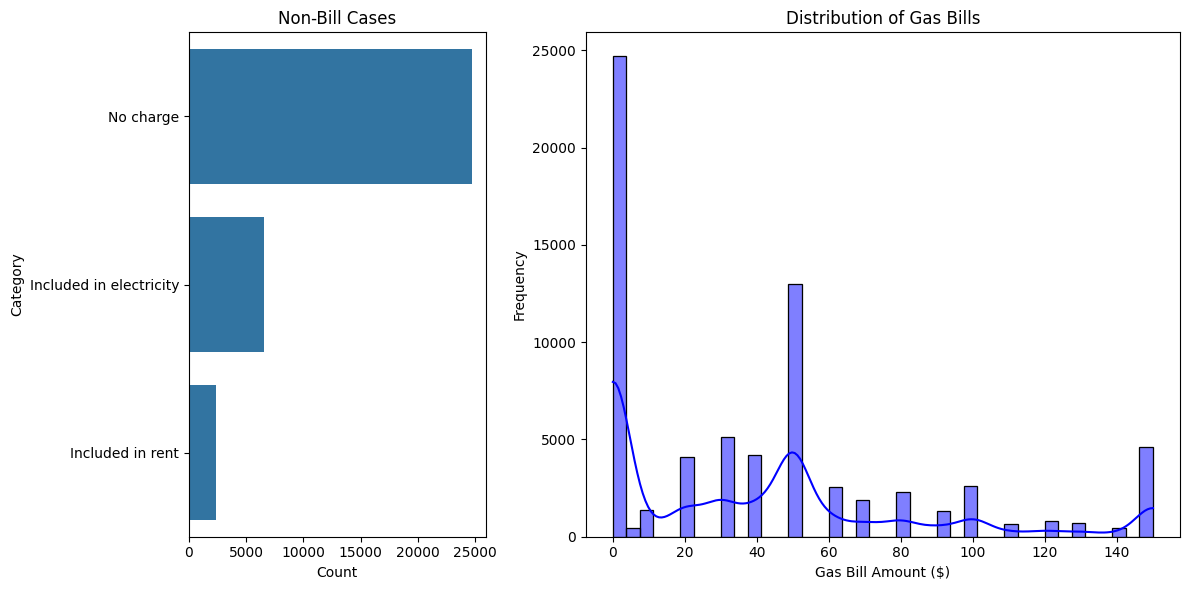

In [92]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

# Bar chart for non-bill cases
non_bills = df[df['gas_category'] != 'Actual Bill']
non_bill_counts = non_bills['gas_category'].value_counts()
sns.barplot(x=non_bill_counts.values, y=non_bill_counts.index, ax=axes[0])
axes[0].set_title('Non-Bill Cases')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category')

# Histogram for actual bills
sns.histplot(df['gas_usage'], bins=40, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Distribution of Gas Bills')
axes[1].set_xlabel('Gas Bill Amount ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

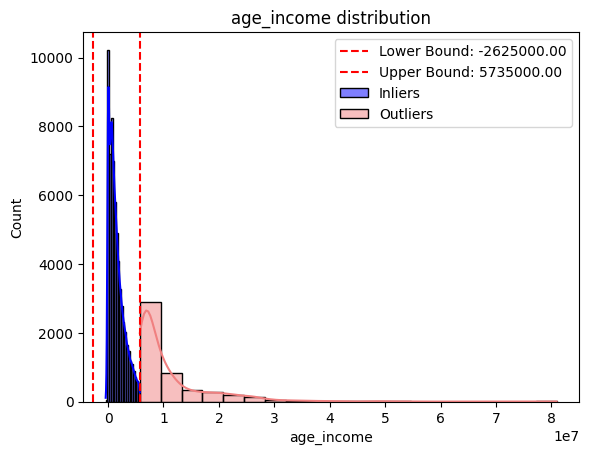

In [93]:
utils.update_df(df)
utils.plot_numeric_dist('age_income')

## **4. Modelling**

First, we defined some helper functions to make the model evaluation less repetitive.

In [94]:


def preprocess_dataframe(df, _preprocessor):
    _df = df.copy()
    
    x_processed = _preprocessor.fit_transform(_df)

    feature_names = label_features + _preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features).tolist() + numerical_features
    feature_names = [name.replace('health_ins_True', 'health_ins') for name in feature_names]
        
    df_processed = pd.DataFrame(x_processed, columns=feature_names)
    
    return df_processed

These functions apply the preprocessing steps for the training datasets.


In [95]:
def classify_split_then_sample(df, preprocessor, sample_function, params, classifier):
    
    # Preprocess data
    preprocessed_df = preprocess_dataframe(df, preprocessor)

    X = preprocessed_df.drop(columns='health_ins')  
    y = preprocessed_df['health_ins']
        
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Sample data
    X_resampled, y_resampled = sample_function(X_train, y_train)
    
    # Train model with GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=10)
    
    grid_search.fit(X_resampled, y_resampled)
    
    # Predict
    y_pred = grid_search.predict(X_test)
    
    # Evaluate
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(report)
    
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title('Confusion Matrix')
    plt.show()

In [96]:
def classify_sample_then_split(df, preprocessor, sample_function, params, classifier):
    
    # Preprocess data
    preprocessed_df = preprocess_dataframe(df, preprocessor)
    
    X = preprocessed_df.drop(columns='health_ins')  
    y = preprocessed_df['health_ins']
        
    # Sample data
    X_resampled, y_resampled = sample_function(X, y)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
    
    # Train model with GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=10)
    grid_search.fit(X_train, y_train)
    
    # Predict
    y_pred = grid_search.predict(X_test)
    
    # Evaluate
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(report)
    
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title('Confusion Matrix')
    plt.show()

These functions apply the sampling techniques and the training process using grid search to obtain the best hyperparameters while also performing cross validation. They display the evaluation scores and confusion matrix. The first one applies the sampling technique after doing the train-test split while the second one applies it before splitting.

#### **4.1. K-Nearest Neightbour**

In [97]:
KNN_params = {
    'n_neighbors': [1,3,5,7]
}

F1 Score: 0.9470060448347836
Accuracy: 0.9493575795254378
Best Parameters: {'n_neighbors': 1}
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     19191
         1.0       1.00      0.90      0.95     19413

    accuracy                           0.95     38604
   macro avg       0.95      0.95      0.95     38604
weighted avg       0.95      0.95      0.95     38604



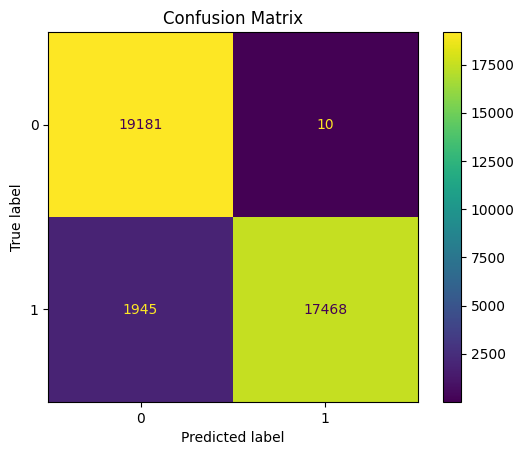

In [98]:
classify_sample_then_split(df, preprocessor, oversample_data, KNN_params, KNeighborsClassifier())

The best results for KNN were achieve using oversampling. This could be due to the fact that oversampling creates new `health_ins=False` entries that are similar to ones that already exist.

#### **4.2. Gaussian Naive Bayes**

In [99]:
gnb_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

F1 Score: 0.5850843545266302
Accuracy: 0.684054075012278
Best Parameters: {'var_smoothing': 6.579332246575683e-05}
              precision    recall  f1-score   support

         0.0       0.62      0.93      0.74     19245
         1.0       0.86      0.44      0.59     19442

    accuracy                           0.68     38687
   macro avg       0.74      0.69      0.66     38687
weighted avg       0.74      0.68      0.66     38687



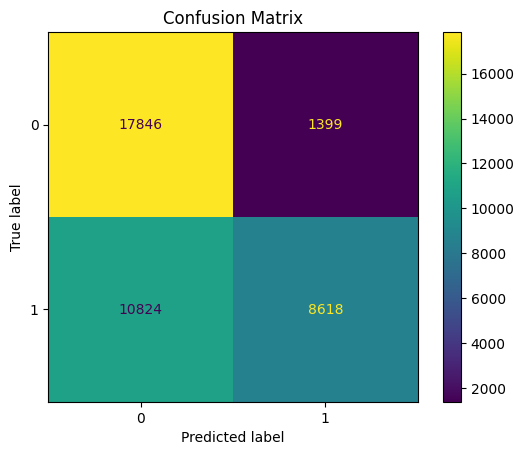

In [100]:
classify_sample_then_split(df, preprocessor, smote_data, gnb_params, GaussianNB())

#### **4.3. Decision Tree**

In [101]:
tree_params = {
    'max_depth': [29],
    'criterion': ['gini'],
    'splitter': ['random'],
    'class_weight': ['balanced']
}

F1 Score: 0.8708713431896823
Accuracy: 0.8726704060795616
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 29, 'splitter': 'random'}
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     19245
         1.0       0.89      0.85      0.87     19442

    accuracy                           0.87     38687
   macro avg       0.87      0.87      0.87     38687
weighted avg       0.87      0.87      0.87     38687



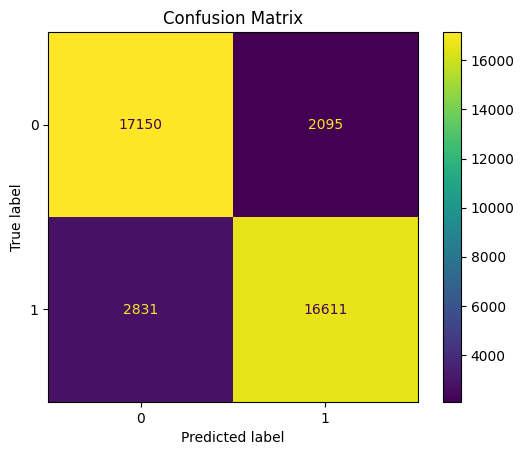

In [102]:
classify_sample_then_split(df, preprocessor, smote_data, tree_params, DecisionTreeClassifier())

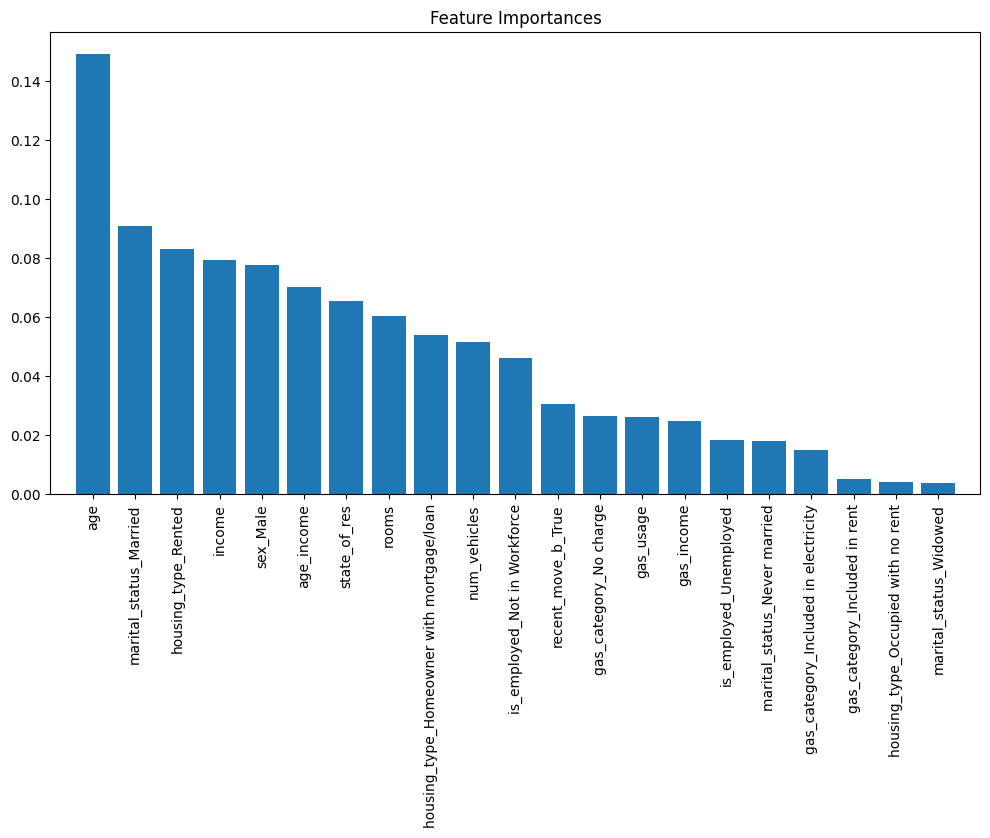

In [103]:
dt = DecisionTreeClassifier(max_depth=29, criterion='gini', splitter='random', class_weight='balanced', min_samples_split=2, min_samples_leaf=1)

df_dt = df.copy()

preprocessed_df = preprocess_dataframe(df_dt, preprocessor)

X = preprocessed_df.drop(columns='health_ins')  
y = preprocessed_df['health_ins']

X_resampled, y_resampled = smote_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


dt.fit(X_train, y_train)

imp = dt.feature_importances_

feature_names = X.columns
indices = np.argsort(imp)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), imp[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### **4.4. Random Forest**

In [104]:
rf_params = {
    'class_weight': ['balanced'],  
    'criterion': ['gini', 'entropy'],  
    'max_depth': [7, 9],   
    'n_estimators': [300],
    'random_state': [42],
    'bootstrap': [True],
}

F1 Score: 0.8277422202604282
Accuracy: 0.8386021144053558
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 300, 'random_state': 42}
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85     19245
         1.0       0.89      0.77      0.83     19442

    accuracy                           0.84     38687
   macro avg       0.84      0.84      0.84     38687
weighted avg       0.85      0.84      0.84     38687



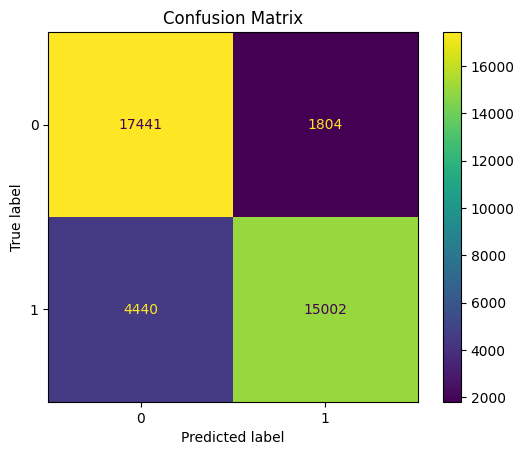

In [105]:
classify_sample_then_split(df, preprocessor, smote_data, rf_params, RandomForestClassifier())

#### **4.5. SVM** 

In [106]:
# best param
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1],
    'class_weight': ['balanced'],
    'probability': [True]
}

F1 Score: 0.7794591912676755
Accuracy: 0.6650339110776187
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
              precision    recall  f1-score   support

         0.0       0.19      0.81      0.30      1911
         1.0       0.97      0.65      0.78     19321

    accuracy                           0.67     21232
   macro avg       0.58      0.73      0.54     21232
weighted avg       0.90      0.67      0.74     21232



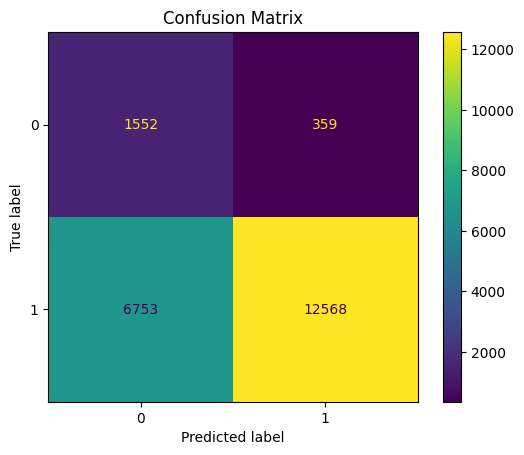

In [107]:
classify_split_then_sample(df, preprocessor, undersample_data, svm_params, SVC())

Since this classifier is very computationally intensive, we applied undersampling to ensure the training dataset is smaller and balanced.

#### **4.6. Neural Network**

In [108]:
def create_nn_model():
    nn = Sequential()
    nn.add(layers.Dense(128, activation='relu', input_dim=21)) 
    nn.add(layers.Dense(64, activation='relu'))
    nn.add(layers.Dense(32, activation='relu'))
    nn.add(layers.Dense(1, activation='sigmoid')) 

    nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return nn

In [109]:
def classify_sample_then_split_nn(df,preprocessor,sample_data,nn):
    # Preprocess data
    preprocessed_df = preprocess_dataframe(df, preprocessor)

    X = preprocessed_df.drop(columns='health_ins')  
    y = preprocessed_df['health_ins']
        
    # Sample data
    X_resampled, y_resampled = sample_data(X, y)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
    
    # Train model
    nn.fit(X_train, y_train, epochs=30, batch_size=32)
    
    # Predict
    y_pred = nn.predict(X_test)
    y_pred = (y_pred > 0.5)
    
    # Evaluate
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(report)
    
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title('Confusion Matrix')
    plt.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7126 - loss: 0.5607
Epoch 2/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7470 - loss: 0.5110
Epoch 3/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7542 - loss: 0.4977
Epoch 4/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7678 - loss: 0.4782
Epoch 5/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.7800 - loss: 0.4558
Epoch 6/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 709us/step - accuracy: 0.7927 - loss: 0.4347
Epoch 7/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.8023 - loss: 0.4121
Epoch 8/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.8160 - loss: 0.3877
Epoch 9/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - accuracy: 0.8229 - loss: 0.3699
Epoch 10/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 715us/step - accuracy: 0.8286 - loss: 0.3584
Epoch 11/30
2821/2821 ━━━━━━━━━━━━━━━━━━━━ 2s 715us/step - accuracy: 0.8372 - loss: 0.3451
Epoch 12/30
2821

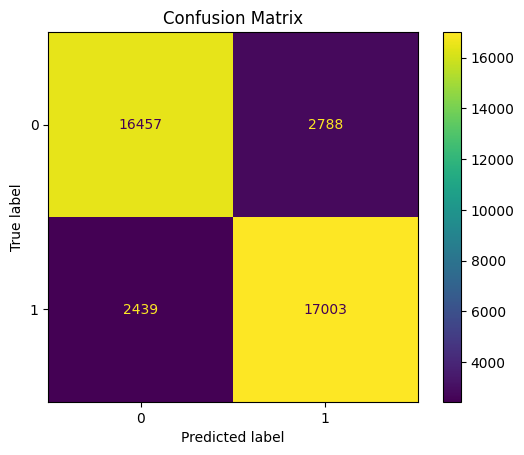

In [110]:
nn = create_nn_model()

classify_sample_then_split_nn(df, preprocessor, smote_data, nn)

K.clear_session()

#### **4.7. XGBoost**

In [111]:
xgb_params = {
    'max_depth': [7, 9],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [200, 300]
}

In [112]:
def classify_sample_then_split_xgb():
    # Preprocess data
    preprocessed_df = preprocess_dataframe(df, preprocessor)

    X = preprocessed_df.drop(columns='health_ins')  
    y = preprocessed_df['health_ins']

    # Sample data
    X_resampled, y_resampled = smote_data(X, y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    # Define the XGBoost classifier and parameter grid
    xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss') 

    # Train model with GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_params, cv=10, scoring='f1', n_jobs=-1)

    grid_search.fit(X_train, y_train)

    # Predict
    y_pred = grid_search.predict(X_test)

    # Evaluate
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(report)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title('Confusion Matrix')
    plt.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score: 0.9478703588724698
Accuracy: 0.9457440483883475
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94     19245
         1.0       0.92      0.98      0.95     19442

    accuracy                           0.95     38687
   macro avg       0.95      0.95      0.95     38687
weighted avg       0.95      0.95      0.95     38687



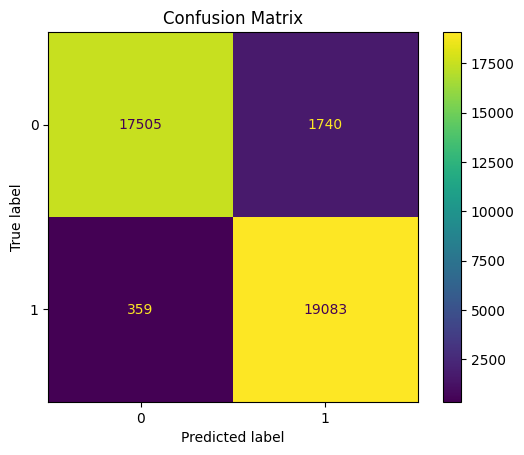

In [113]:
classify_sample_then_split_xgb()

#### **4.8. Logistic Regression**

In [114]:
logistic_params = {
    'C': [1.0],
    'max_iter': [1000],
    'class_weight': ['balanced'],
}

F1 Score: 0.7064259849754094
Accuracy: 0.7191821542120092
Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 1000}
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73     19245
         1.0       0.74      0.67      0.71     19442

    accuracy                           0.72     38687
   macro avg       0.72      0.72      0.72     38687
weighted avg       0.72      0.72      0.72     38687



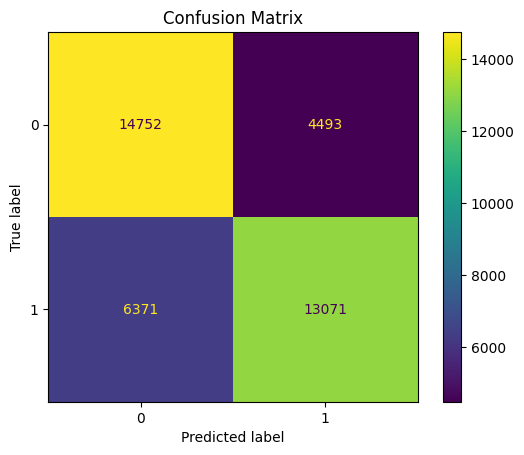

In [115]:
classify_sample_then_split(df, preprocessor, smote_data, logistic_params, LogisticRegression())

## **5. Evaluation and Main Conclusions**

We believe that for this type of problem, the best models are the ones that are easy to interpret, such as Decision Trees and Random Forests. These models are able to provide insights into the most important features that drive the prediction. Since our Decision Tree model achieved the best results, we will use it to make the final predictions. For this model to correctly predict if a customer has health insurance, we need to consider the following procedures: 
- **Data Cleaning**: We need to handle missing values and outliers in the dataset.
- **Data Transformation**: We need to transform the data into a format that the model can understand. This includes one-hot encoding for categorical features and scaling for numerical features.
- **Data Sampling**: We need to handle the class imbalance issue by using sampling techniques such as SMOTE, Random Oversampling, and Undersampling. For this we chose ADASYN.
- **Model Training**: We need to train the model using the best hyperparameters found in the grid search process.
- **Model Evaluation**: We need to evaluate the model using metrics such as accuracy, precision, recall, and F1-score. We will also use the confusion matrix to visualize the results.

Since almost all models achieved relatively good results during the training phase, we believe that a simpler model like the Decision Tree is the best choice for this problem. This model is easy to interpret, provides insights into the most important features that drive the prediction and is easily customizable, meaning that we can easily adjust the hyperparameters to improve the results and reduce overfitting.


### **5.1. Gains From our effort**

Thanks to our effort, we believe that the business will achieve the following gains:
- **Improved Customer Targeting**: Identify the customers that most likely don't have health insurance and target them with personalized marketing campaigns.
- **Optimized Resource Allocation**: Allocate resources more efficiently by focusing on the customers that are most likely to convert.
- **Enhanced Risk Management**: Predict claim probabilities and risks associated with different customer segments. This allows the business to ensure minimize financial risks, and ensure profitability.
- **Transparent Decision-Making**: Provide insights into the most important features that drive the prediction. This allows the business to make data-driven decisions and improve the overall customer experience.

### **5.2. Lessons learned**

With the development of this data science project, we were able to learn more about how important data exploration and preprocessing are for the success of a model. We also learned how to handle class imbalance issues and how to choose the best sampling techniques for each model. We also learned how to use grid search to find the best hyperparameters for each model and how to evaluate the model using different metrics. 

### **5.3. Summary of achieved results**

We successfully developed a predictive model to classify customers based on their likelihood to purchase health insurance. We identified the most influential factors that drive insurance uptake and achieved a model accuracy above 70%. We also identified the top 5 features that influence insurance uptake.

## **6. Submission**

This section corresponds to the methods used to make the submissions to kaggle. It includes training the models with the best parameters we found in the previous section and using them to predict the values on the masked dataset. 

### **6.1. Preprocessing**

In [116]:
raw_data = pd.read_csv('customer.csv')
masked_df = pd.read_csv('customer_test_masked.csv')

In [117]:
label_features = ['state_of_res']
categorical_features = ['sex', 'marital_status', 'housing_type', 'gas_category', 'recent_move_b', 'is_employed']
numerical_features = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms', 'age_income','gas_income']
target_feature = 'health_ins'
id_feature = 'custid'

preprocessor = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(), label_features),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

def preprocess_dataframe(df, fit_preprocessor=True):
    global preprocessor
    
    df_features = df.drop(target_feature, axis=1, errors='ignore')
    
    if fit_preprocessor:
        features_processed = preprocessor.fit_transform(df_features)
    else:
        features_processed = preprocessor.transform(df_features)

    feature_names = (
        label_features +
        preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features).tolist() +
        numerical_features +
        [id_feature]
    )
    
    df_processed = pd.DataFrame(features_processed, columns=feature_names)
    
    df_processed = df_processed.reset_index(drop=True)

    if target_feature in df.columns:
        df_target = df[target_feature].reset_index(drop=True)
        df_processed[target_feature] = df_target
    
    return df_processed

In [118]:
def handle_gas_feature(df):
    
    df_copy = df.copy()
    
    gas_median = df_copy[df_copy['gas_usage'] > 3].gas_usage.median()

    non_bill_cases_values = {
        1: gas_median,
        2: gas_median,
        3: 0
    }
    non_bill_cases = {
        1: 'Included in rent', 
        2: 'Included in electricity', 
        3: 'No charge'
    }

    df_copy['gas_category'] = df_copy['gas_usage'].replace(non_bill_cases).where(
        df_copy['gas_usage'].isin(non_bill_cases.keys()), 'Actual Bill'
    )
    df_copy.loc[pd.isna(df_copy['gas_usage']), 'gas_category'] = 'Unknown'

    df_copy['gas_usage'] = df_copy['gas_usage'].replace(non_bill_cases_values)
    df_copy['gas_usage'] = df_copy['gas_usage'].fillna(gas_median)

    df_copy['gas_income'] = df_copy['gas_usage'] * df_copy['income']
    
    return df_copy

In [119]:
def apply_data_engineering_replace(df):
    
    df_replaced = df.copy()
    
    df_replaced.drop(columns=['Unnamed: 0', 'code_column'], inplace=True)

    df_replaced['housing_type'] = df_replaced['housing_type'].fillna(df_replaced['housing_type'].mode()[0])
    
    df_replaced['is_employed'] = df_replaced['is_employed'].fillna(False)
    
    df_replaced['num_vehicles'] = df_replaced['num_vehicles'].fillna(round(df['num_vehicles'].mean(),0))
    
    df_replaced['recent_move_b'] = df_replaced['recent_move_b'].fillna(df_replaced['recent_move_b'].mode()[0])
    df_replaced['recent_move_b'] = df_replaced['recent_move_b'].replace({'T': True, 'F': False})
    
    Q1 = df['age'].quantile(0.25)
    Q3 = df['age'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_age = df['age'].median()
    df['age'] = df['age'].apply(lambda x: median_age if x < lower_bound or x > upper_bound else x)
    
    df_replaced = handle_gas_feature(df_replaced)
    
    df_replaced['age_income'] = df_replaced.age * df_replaced.income
    
    return df_replaced

### **6.2 XGBoost**

In [120]:
def apply_data_engineering_xgb(df):
    df_filtered = df.copy()
    
    df_filtered.drop(columns=['Unnamed: 0'], inplace=True)

    df_filtered['age'] = df_filtered['age'].replace([0, 120], np.nan)

    handle_gas_feature(df_filtered)

    df_filtered['age_income'] = np.where(df_filtered['age'].isna(), np.nan, df_filtered['age'] * df_filtered['income'])
    

    return df_filtered

In [121]:
def convert_feature_types(df):
    for col in df.select_dtypes(include=['object']).columns:
        if col in categorical_features or col in label_features:
            df[col] = df[col].astype('category')
        elif col in numerical_features:
            df[col] = df[col].astype('float')

In [122]:
xgb_train_df = apply_data_engineering_xgb(raw_data)
xgb_sub_df = apply_data_engineering_xgb(masked_df)

convert_feature_types(xgb_train_df)
convert_feature_types(xgb_sub_df)

In [123]:
X = xgb_train_df.drop([target_feature, id_feature], axis=1)
y = xgb_train_df[target_feature]

dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)

params = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'scale_pos_weight': 2, 'subsample': 0.8}

num_rounds = 100

bst = xgb.train(params, dtrain, num_rounds)

sub = xgb_sub_df.drop([target_feature, id_feature], axis=1)
dsubmission = xgb.DMatrix(sub, enable_categorical=True)

preds = bst.predict(dsubmission)
y_pred = [True if pred > 0.9 else False for pred in preds]

xgb_submission_df = pd.DataFrame({
    'custid': masked_df['custid'],  
    'health_ins': y_pred      
})

xgb_submission_df.to_csv('submissions/xgb_submission.csv', index=False)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


### **6.3. Random Forest**

In [124]:
rf_train_data = apply_data_engineering_replace(raw_data)
rf_submission_data = apply_data_engineering_replace(masked_df)

rf_train_data = preprocess_dataframe(rf_train_data, fit_preprocessor=True)
rf_submission_data = preprocess_dataframe(rf_submission_data, fit_preprocessor=False)
rf_submission_data['health_ins'] = rf_submission_data['health_ins'].astype(bool)

C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced['is_employed'] = df_replaced['is_employed'].fillna(False)
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced['recent_move_b'] = df_replaced['recent_move_b'].replace({'T': True, 'F': False})
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will 

In [125]:
X = rf_train_data.drop([target_feature, id_feature], axis=1)
y = rf_train_data[target_feature]

rf_model = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=20, n_estimators=300)

X_resampled, y_resampled = smote_data(X, y)

rf_model.fit(X_resampled, y_resampled)

rf_submission_features = rf_submission_data.drop(columns=[target_feature, id_feature])

y_pred = rf_model.predict(rf_submission_features)

rf_submission_df = pd.DataFrame({
    'custid': rf_submission_data['custid'], 
    'health_ins': y_pred           
})

rf_submission_df.to_csv('submissions/rf_submission.csv', index=False)



### **6.4. Decision Tree**

In [126]:
dt_train_data = apply_data_engineering_replace(raw_data)
dt_submission_data = apply_data_engineering_replace(masked_df)

dt_train_data = preprocess_dataframe(dt_train_data, fit_preprocessor=True)
dt_submission_data = preprocess_dataframe(dt_submission_data, fit_preprocessor=False)
dt_submission_data['health_ins'] = dt_submission_data['health_ins'].astype(bool)

C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced['is_employed'] = df_replaced['is_employed'].fillna(False)
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced['recent_move_b'] = df_replaced['recent_move_b'].replace({'T': True, 'F': False})
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will 

In [127]:
X = dt_train_data.drop([target_feature, id_feature], axis=1)
y = dt_train_data[target_feature]

dt_model = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=29, splitter='best', min_samples_split=2, min_samples_leaf=1)

X_resampled, y_resampled = smote_data(X, y)

dt_model.fit(X_resampled, y_resampled)

dt_submission_features = dt_submission_data.drop(columns=[target_feature, id_feature])

y_pred = dt_model.predict(dt_submission_features)

dt_submission_df = pd.DataFrame({
    'custid': dt_submission_data['custid'],
    'health_ins': y_pred 
})

dt_submission_df.to_csv('submissions/dt_submission.csv', index=False)

### **6.5. SVM**

In [128]:
svm_train_data = apply_data_engineering_replace(raw_data)
svm_submission_data = apply_data_engineering_replace(masked_df)

svm_train_data = preprocess_dataframe(svm_train_data, fit_preprocessor=True)
svm_submission_data = preprocess_dataframe(svm_submission_data, fit_preprocessor=False)
svm_submission_data['health_ins'] = svm_submission_data['health_ins'].astype(bool)

C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced['is_employed'] = df_replaced['is_employed'].fillna(False)
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced['recent_move_b'] = df_replaced['recent_move_b'].replace({'T': True, 'F': False})
C:\Users\User\AppData\Local\Temp\ipykernel_4324\3109259970.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will 

In [129]:
from sklearn.svm import SVC

X = svm_train_data.drop([target_feature, id_feature], axis=1)
y = svm_train_data[target_feature]

svm_model = SVC(C=0.1, kernel='rbf', gamma=0.01, class_weight='balanced')

X_resampled, y_resampled = undersample_data(X, y)

svm_model.fit(X_resampled, y_resampled)

svm_submission_features = svm_submission_data.drop(columns=[target_feature, id_feature])

y_pred = svm_model.predict(svm_submission_features)

svm_submission_df = pd.DataFrame({
    'custid': svm_submission_data['custid'], 
    'health_ins': y_pred          
})


svm_submission_df.to_csv('submissions/svm_submission.csv', index=False)